## **Cars4U Project**

#### **Context**
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

## **Objective**

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

### **Data Description**
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

Data Dictionary

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in dollars
- Price: The price of the used car in dollars

### **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remove limit for the number of displayed columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

### **Load Dataset**

In [3]:
df =pd.read_csv("used_cars_data-1.csv")
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN


In [4]:
# show some few rows of the dataset
df.sample(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2882,2882,Ford Figo Aspire 1.5 TDCi Trend,Hyderabad,2016,72566,Diesel,Manual,First,25.83 kmpl,1498 CC,99 bhp,5.0,7.650,5.29
6278,6278,Toyota Etios GD,Bangalore,2012,90000,Diesel,Manual,First,23.59 kmpl,1364 CC,NaN,5.0,8.525,NaN
6447,6447,Mahindra Xylo D4 BSIV,Kolkata,2013,61000,Diesel,Manual,First,14.0 kmpl,2498 CC,112 bhp,8.0,11.670,NaN
268,268,Maruti A-Star Vxi,Pune,2010,67000,Petrol,Manual,First,19.0 kmpl,998 CC,66.1 bhp,5.0,7.880,2.00
5597,5597,Hyundai i10 Asta,Ahmedabad,2011,86000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,10.250,3.75


In [5]:
# check for the duplicates
df.duplicated().sum()

0

- There are no duplicated records in the dataset.

In [6]:
# check the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [18]:
df.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price            float64
Price                float64
dtype: object

- Observations:
    - There are 14 variables in the dataset
    - Mileage should be a numeric/continous datatype but it is recorded as an object datatype because of the different units.
    - Engine was recorded as an object datatype because of the unit (CC)
    - Power variable is an object datatype as well because of the unit and some values are not available.

In [7]:
# check the dimension
df.shape

(7253, 14)

- There are 14 variables in the dataset while the number of cars is 7253.

In [8]:
# check for missing values

df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

- There are 8 variables with no missing values; they are s.No, Name, Location, Year, Kilometers_Driven, \n
Fuel_Type, Transmission, Owner_Type.
- Variable milage has 2 missing values.
- Engine column has 46 missing values
- Power attribute has 175.
- In the seat column, there are 53 missing values
- Price column has 1234 missing columns.

In [ ]:
# checking for location

In [24]:
df["Location"].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

- Thre are 11 available locations the used cars are sold.

In [38]:
df["Location"].value_counts()

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

- Mumbai has the highest number (949 units) of used cars for sale
- This is followed by Hyderabad with 876 used cars.
- Coimbatore and Kochi have the same number of used cars for sale (772 each).

## Treating Mileage Column

In [33]:
df["Mileage"].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

- There are two units that was recorded in the dataset, so we need to stick with one by converting km/kg to kmpl or kmpl to km/kg 

In [57]:
df[df["Fuel_Type"]=="CNG"]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.510,1.75
127,127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.510,3.25
328,328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.0,7.880,1.40
440,440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.0,4.925,4.70
839,839,Maruti Alto Green LXi (CNG),Delhi,2012,65537,CNG,Manual,First,26.83 km/kg,796 CC,38.4 bhp,5.0,4.360,2.10
893,893,Hyundai Accent Executive CNG,Hyderabad,2010,95637,CNG,Manual,Second,13.2 km/kg,1495 CC,93.7 bhp,5.0,10.250,1.90
1135,1135,Maruti Zen Estilo LXI Green (CNG),Ahmedabad,2011,76000,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.0,7.880,2.00
1218,1218,Maruti Wagon R LXI CNG,Pune,2015,70000,CNG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,5.510,3.65
1269,1269,Maruti Alto 800 2016-2019 CNG LXI,Mumbai,2018,10600,CNG,Manual,First,33.44 km/kg,796 CC,40.3 bhp,4.0,4.360,3.50
1323,1323,Maruti Eeco 5 STR With AC Plus HTR CNG,Mumbai,2018,20000,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.0,4.925,4.50


- Those cars with fuel type CNG are the ones having km/kg as their units and this should be convert to kmpl to have the same unit.

In [125]:
df[df["Mileage"] == "0.0"]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,throw away
14,14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179 CC,115 bhp,5.0,120.000,17.50,kmpl
67,67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950 CC,194 bhp,5.0,49.140,35.67,kmpl
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086 CC,NaN,5.0,4.550,1.30,kmpl
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,13.580,2.95,kmpl
229,229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498 CC,99 bhp,NaN,7.650,3.60,kmpl
262,262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,0.0,1086 CC,NaN,5.0,4.550,1.75,kmpl
307,307,Hyundai Santro Xing XL,Chennai,2006,58000,Petrol,Manual,Second,0.0,1086 CC,NaN,5.0,4.550,1.50,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968 CC,NaN,5.0,10.150,5.45,kmpl
443,443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086 CC,NaN,5.0,4.550,3.35,kmpl
544,544,Mercedes-Benz New C-Class Progressive C 200,Kochi,2019,13190,Petrol,Automatic,First,0.0,1950 CC,181.43 bhp,5.0,49.490,38.99,kmpl


In [54]:
df[df["Mileage"].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,24.01,12.75


- Electric cars do not use fuel, so we could replace NaN as zero.

In [134]:
df["Mileage"].fillna(0, inplace=True)

In [135]:
# sanity check

df[df["Mileage"].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_Units


In [123]:
Mileage_new = df['Mileage'].str.split(' ', expand = True)
Mileage_new

,0
0,26.6
1,19.67
2,18.2
3,20.77
4,15.2
...,...
7248,20.54
7249,17.21
7250,23.08
7251,17.2


In [130]:
df.columns = df.columns.str.replace("throw away", "Mileage_Units")

In [131]:
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_Units
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998 CC,58.16 bhp,5.0,5.51,1.75,km/kg
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,16.06,12.50,kmpl
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199 CC,88.7 bhp,5.0,8.61,4.50,kmpl
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,11.27,6.00,kmpl
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968 CC,140.8 bhp,5.0,53.14,17.74,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598 CC,103.6 bhp,5.0,13.23,NaN,kmpl
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197 CC,103.6 bhp,5.0,10.15,NaN,kmpl
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461 CC,63.1 bhp,5.0,9.47,NaN,kmpl
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197 CC,103.6 bhp,5.0,10.15,NaN,kmpl


## Treating Engine Column

In [126]:
df["Engine"].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [127]:
df[df["Engine"] == " "]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,throw away


In [136]:
df[df["Engine"].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_Units
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,13.580,2.95,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,NaN,NaN,NaN,7.880,2.11,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,NaN,NaN,NaN,7.880,1.75,kmpl
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0,NaN,NaN,NaN,120.000,26.50,kmpl
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8,NaN,NaN,NaN,13.580,3.20,kmpl
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1,NaN,NaN,NaN,7.880,5.80,kmpl
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,13.580,1.50,kmpl
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0,NaN,NaN,NaN,120.000,40.88,kmpl
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1,NaN,NaN,NaN,7.880,3.15,kmpl
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0,NaN,NaN,NaN,4.550,1.93,kmpl


In [137]:
df[['Engine', 'Engine_Units']]= df['Engine'].str.split(' ', expand = True)

## Treating Power Column

In [143]:
df["Power"].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp', nan,
       '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp', '218 bhp',
       '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp', '82.85 bhp',
       '67 bhp', '241.4 bhp', '35 bhp',

In [144]:
df[df["Engine"] == " "]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_Units,Engine_Units


In [152]:
df[df["Power"].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_Units,Engine_Units
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8,1399,NaN,5.0,11.685,2.00,kmpl,CC
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086,NaN,5.0,4.550,1.30,kmpl,CC
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0,1086,NaN,5.0,4.550,2.10,kmpl,CC
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086,NaN,5.0,4.550,0.85,kmpl,CC
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0,1086,NaN,5.0,4.550,1.67,kmpl,CC
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,13.580,2.95,kmpl,NaN
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,NaN,NaN,NaN,7.880,2.11,kmpl,NaN
227,227,Maruti Swift VDI BSIV,Delhi,2013,47000,Diesel,Manual,First,17.8,1248,NaN,5.0,7.880,4.10,kmpl,CC
245,245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.0,1086,NaN,5.0,4.550,0.95,kmpl,CC
262,262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,0.0,1086,NaN,5.0,4.550,1.75,kmpl,CC


In [154]:
df[['Power', 'Power_Units']]= df['Power'].str.split(' ', expand = True)

In [155]:
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_Units,Engine_Units,Power_Units
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,5.51,1.75,km/kg,CC,bhp
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,16.06,12.50,kmpl,CC,bhp
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61,4.50,kmpl,CC,bhp
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,11.27,6.00,kmpl,CC,bhp
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,53.14,17.74,kmpl,CC,bhp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0,13.23,NaN,kmpl,CC,bhp
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0,10.15,NaN,kmpl,CC,bhp
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0,9.47,NaN,kmpl,CC,bhp
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0,10.15,NaN,kmpl,CC,bhp


In [171]:
df.dropna(subset=["Engine"], inplace=True)

In [172]:
df.dropna(subset=["Power"], inplace=True)

In [175]:
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_Units,Engine_Units,Power_Units
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,5.51,1.75,km/kg,CC,bhp
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,16.06,12.50,kmpl,CC,bhp
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61,4.50,kmpl,CC,bhp
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,11.27,6.00,kmpl,CC,bhp
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,53.14,17.74,kmpl,CC,bhp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0,13.23,NaN,kmpl,CC,bhp
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0,10.15,NaN,kmpl,CC,bhp
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0,9.47,NaN,kmpl,CC,bhp
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0,10.15,NaN,kmpl,CC,bhp


In [174]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   3
New_Price               0
Price                1202
Mileage_Units           2
Engine_Units            0
Power_Units             0
dtype: int64

In [176]:
df.to_csv("Cars4u_cleaned.csv", index=False)

In [177]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler

In [181]:
df =pd.read_csv("Cars4u_cleaned.csv")

In [182]:
# show some few rows of the dataset
df.sample(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_Units,Engine_Units,Power_Units
6753,6925,Mercedes-Benz B Class 2012-2015 B200 Sport CDI,Bangalore,2013,43000,Diesel,Automatic,First,15.00,2147,107.30,5.0,37.030,NaN,kmpl,CC,bhp
6529,6695,Honda Brio 1.2 VX MT,Kochi,2014,43814,Petrol,Manual,First,18.50,1198,86.80,5.0,6.630,NaN,kmpl,CC,bhp
5698,5835,Ford Ecosport 1.5 DV5 MT Ambiente,Hyderabad,2014,56549,Diesel,Manual,First,22.70,1498,89.84,5.0,11.685,7.2,kmpl,CC,bhp
6624,6792,Toyota Innova 2.5 GX (Diesel) 8 Seater,Chennai,2014,173000,Diesel,Manual,Second,12.99,2494,100.60,8.0,24.010,NaN,kmpl,CC,bhp
3038,3119,Maruti Alto K10 LXI CNG Optional,Kochi,2018,44202,CNG,Manual,First,32.26,998,58.20,4.0,4.660,4.0,km/kg,CC,bhp


In [184]:
# perform summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7078.0,3628.719412,2092.883773,0.00,1814.2500,3631.50,5438.5000,7252.00
Year,7078.0,2013.480503,3.153077,1998.00,2012.0000,2014.00,2016.0000,2019.00
Kilometers_Driven,7078.0,58253.479514,85212.226775,171.00,33458.7500,53000.00,72566.0000,6500000.00
Mileage,7078.0,18.268227,4.369135,0.00,15.2600,18.25,21.1000,33.54
Engine,7078.0,1620.717717,596.002717,72.00,1198.0000,1495.00,1984.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.0000,94.00,138.1000,616.00
Seats,7075.0,5.284664,0.809602,2.00,5.0000,5.00,5.0000,10.00
New_Price,7078.0,21.450564,24.231724,3.91,7.9400,11.30,21.7700,375.00
Price,5876.0,9.602665,11.246531,0.44,3.5175,5.75,10.0125,160.00


#### Observations
- Year:
- The average year of the cars is 2013.
- The old car was manufactured in the year 1998.
- 25% of the cars are produced in or before 2012.
- 50% of the cars are manufactured in 2014.
- 75% of the cars are produced in 2016.
- The latest production year among the cars is year 2019.

- kilometers_Driven:
- The mean distance covered by all the cars is 58253.48 km.
- The least distance covered by a car is 171.00km
- 25% of the cars have covered 33458.75 km or less
- 50% of the fleets of cars have traveled 53000.00km or less
- 75% of the entire cars have covered a distance of 72566.00km or less
- The maximum distance traveled by a car is 6500000.00km

- Mileage:
- average mileage of the cars is 8.26
- Some cars have mileage of 0.00 indicating that the previous user did not drive it at all.
- 25% of the cars possess 15.26 mileage or less
- 50% of the fleets of cars have 18.25 mileage or less
- 75% of the cars have 21.1
- The highest mileage is 33.54

- Engine:

- Power:

- Seat:

### Perform Correlation

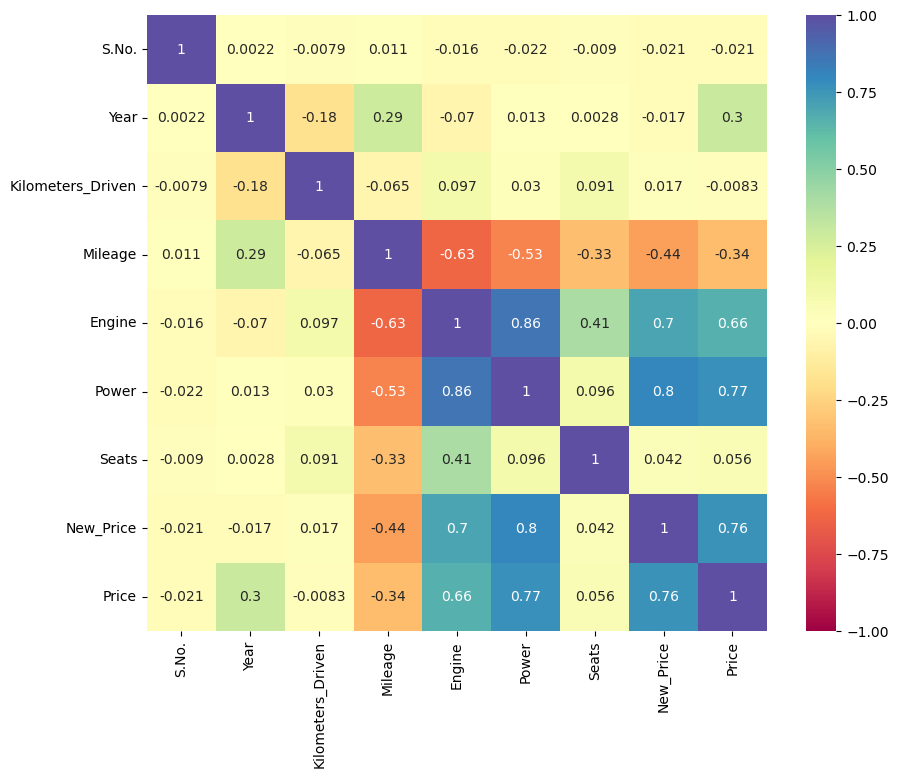

In [185]:
numeric_df = df.select_dtypes(include = "number")

# correlation
mat_cor = numeric_df.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(mat_cor, vmin=-1, vmax=1, annot=True, cmap="Spectral");

#### Observation:
- There is a high positive relationship between power and the engine. This means that when the engine is sound, the power of the car will also be high.
- The power variable is also highly correlated with the target (New_Price).

In [187]:
# for non_numeric categories
cat_columns = df.select_dtypes(include = "object").columns

cat_columns

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage_Units', 'Engine_Units', 'Power_Units'],
      dtype='object')

In [188]:
for col in cat_columns:
    print(df[col].value_counts())
    print("-" * 50) # print 50 of the dash that is showing below.

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Toyota Fortuner 3.0 Diesel              35
                                        ..
BMW 7 Series 2007-2012 750Li             1
Hyundai EON 1.0 Magna Plus Option O      1
Jaguar XJ 2.0L Portfolio                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 1971, dtype: int64
--------------------------------------------------
Mumbai        935
Hyderabad     850
Kochi         765
Coimbatore    762
Pune          734
Delhi         650
Kolkata       633
Chennai       570
Jaipur        485
Bangalore     423
Ahmedabad     271
Name: Location, dtype: int64
--------------------------------------------------
Diesel      3784
Petrol      3219
CNG           61
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
--------------------------------------------

### Univariate Analysis

In [189]:
# Defining the function for creating boxplot and hisogram along the same scale
def histogram_boxplot(data, feature, figsize=(9, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise")
    # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple")  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

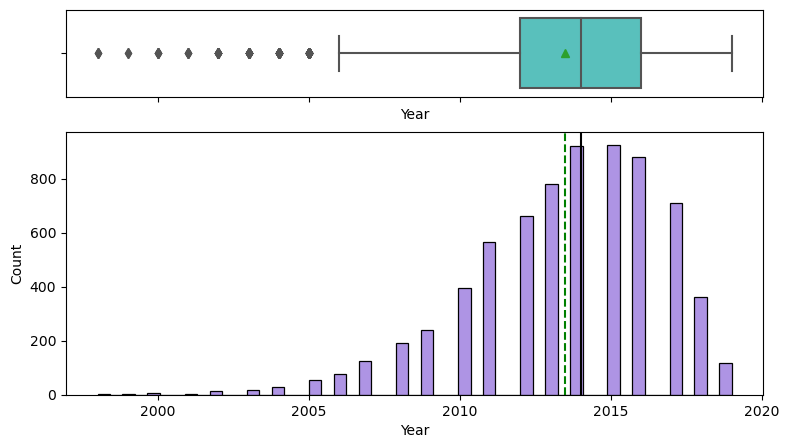

In [192]:
histogram_boxplot(data = df, feature = "Year")

- Observations:
- Approximately normally distributed. Tis is an indication that this variables obeys the linear regression law of normality.
- Most of the cars were produced between year 2012 and 18.

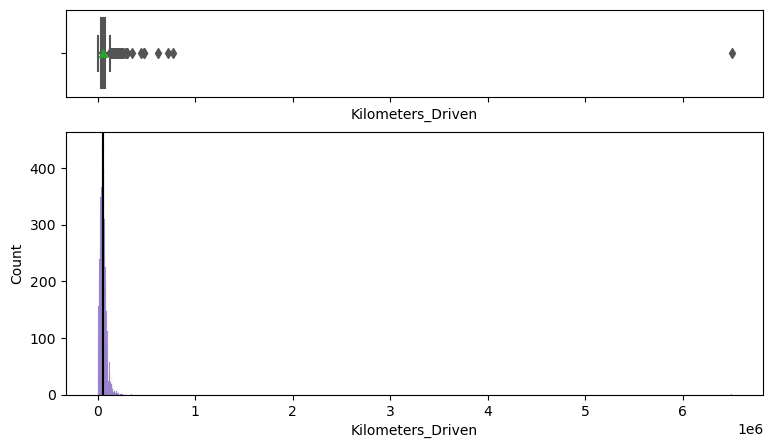

In [193]:
histogram_boxplot(data = df, feature = "Kilometers_Driven")

- Observation;
- The kilometers covered by most cars are almost in the same range.

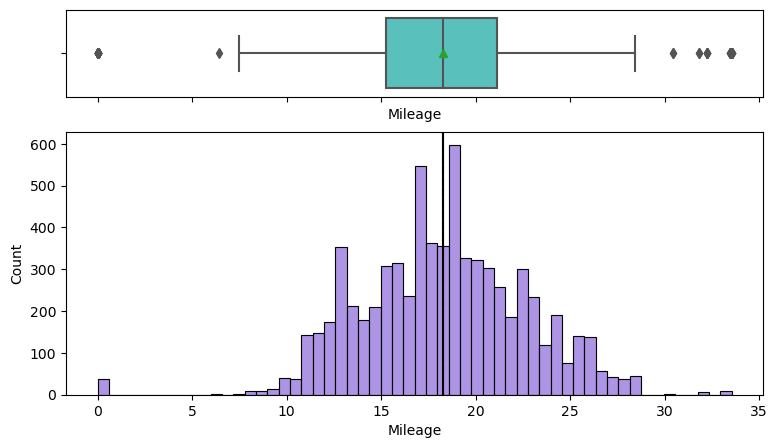

In [194]:
histogram_boxplot(data = df, feature = "Mileage")

- The highest mileage is between 15 and 20.

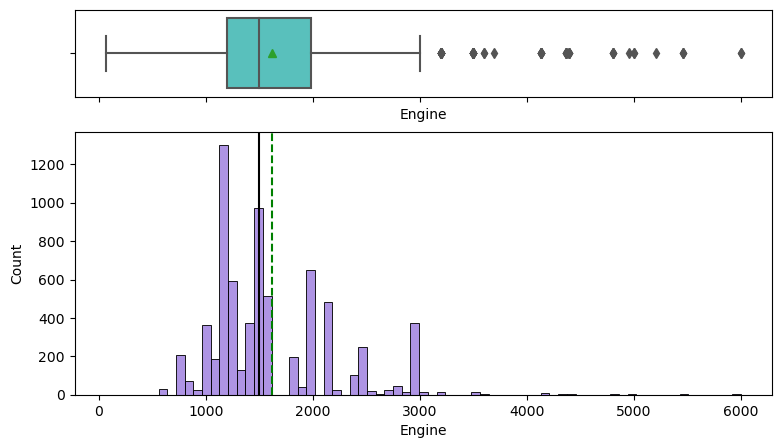

In [195]:
histogram_boxplot(data = df, feature = "Engine")

- Right skewed
- Most of the cars have over 1000 bhp as engine value.

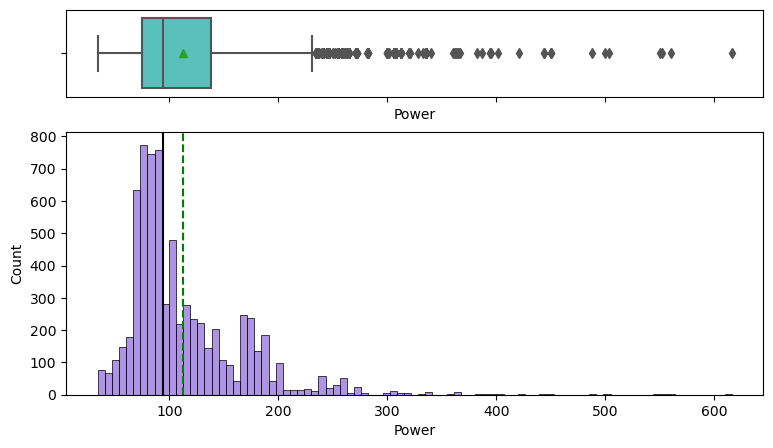

In [197]:
histogram_boxplot(data = df, feature = "Power")

- Right skewed distribution

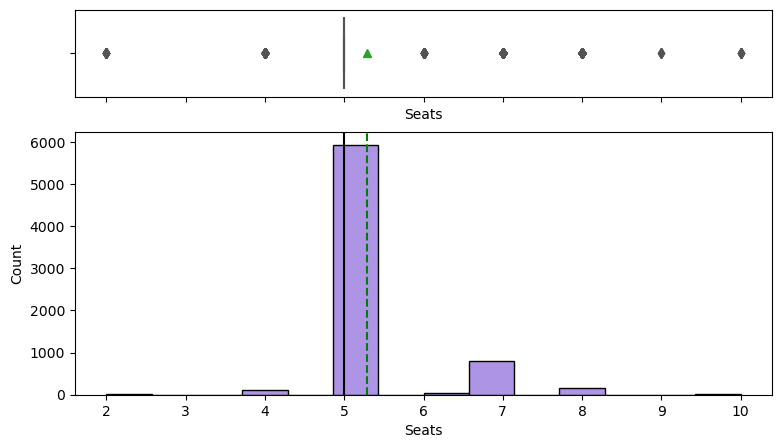

In [198]:
histogram_boxplot(data = df, feature = "Seats")

- Right skewed distribution
- over 5000 cars have 5 seats in them.

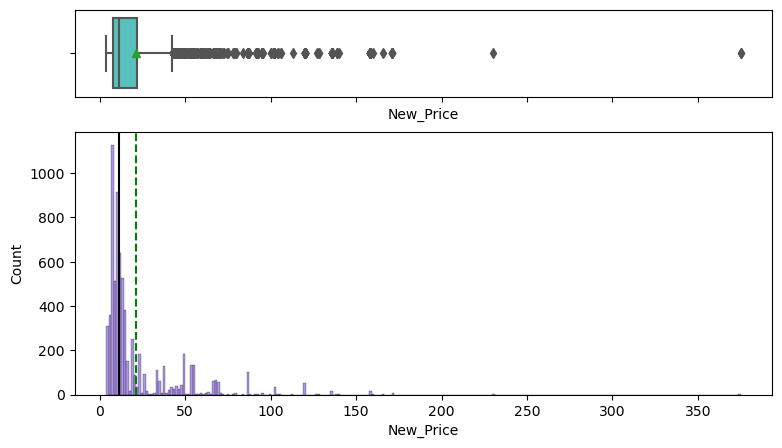

In [199]:
histogram_boxplot(data = df, feature = "New_Price")

- Majority of the cars are sold between the price of 10 to 30 dollars

In [201]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

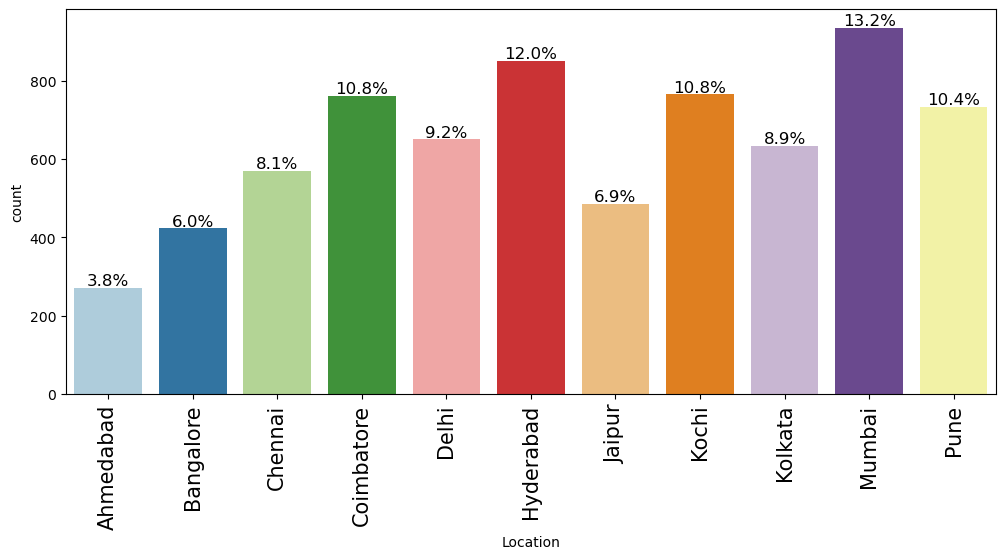

In [203]:
labeled_barplot(data = df, feature = "Location", perc = True)

- Observations:
    - Mumbai the higher number of cars that are available for sale with 13.2% of the entire cars.
    - The second largest car location is Hyderabad with 12.0%.
    - The third largest location are Coimbatore and Kochi with 10.8% each.
    - The location with the least number of cars for sale is Ahmedabad.

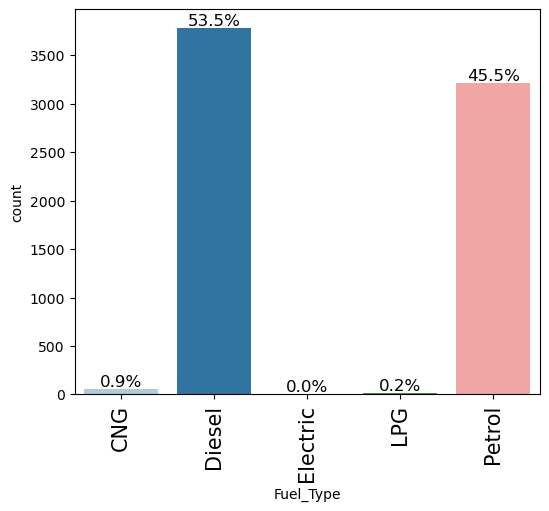

In [204]:
labeled_barplot(data = df, feature = "Fuel_Type", perc = True)

- Observations:
- A good number of the cars use both diesel and petrol.
- Cars that use diesel are 53.5%
- Cars that use petrol are 45.5%
- 0.9% of the cars use compressed Natural Gas (CNG)
- 0.2% of the cars use Liquified Natural Gas (LNG)
- Least that 5 cars use electricity.

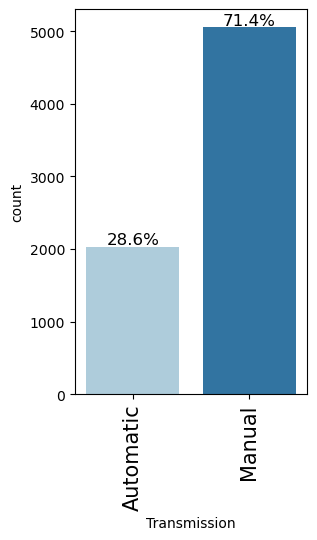

In [205]:
labeled_barplot(data = df, feature = "Transmission", perc = True)

- Observation:
    - 28.6% of the cars are automatic while 71.4% are manual.

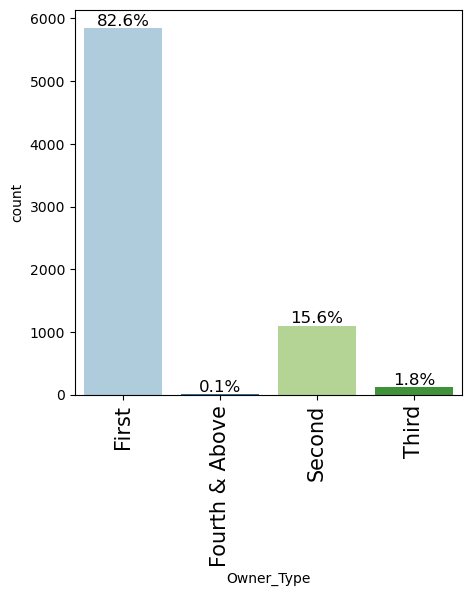

In [206]:
labeled_barplot(data = df, feature = "Owner_Type", perc = True)

- Observations:
    - Larger number of the cars were previously used by only one user
    - 15.6% are used by two users
    - 1.8% of the cars were used by 3 different users.
    - Four users and above category 0.1%

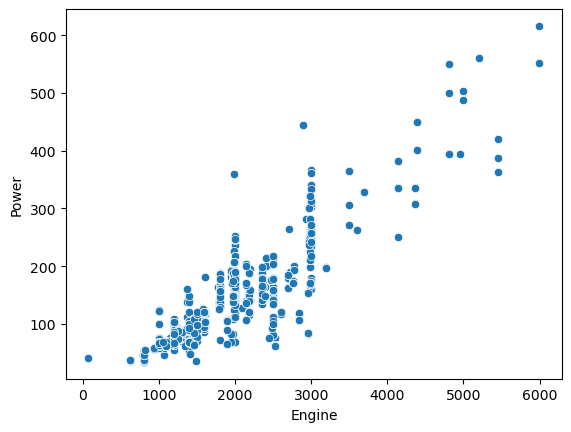

In [208]:
# Power Vs Engine
sns.scatterplot(data = df, x = 'Engine', y = 'Power');

- This supports the earlier observation between Power and Engine. They are highly correlated which is also an indication of multicollinearity. As the engine values are increasing, the power of the cars are also increasing.

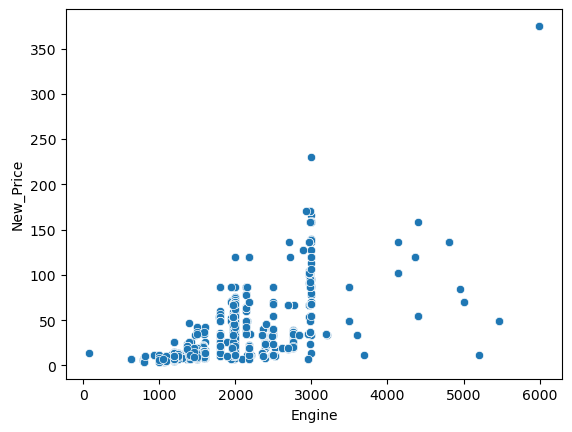

In [209]:
# New_Price Vs Engine
sns.scatterplot(data = df, x = 'Engine', y = 'New_Price');

- Slight indication of an increment and a relation.
- The higher the engine value, the higher the new price.

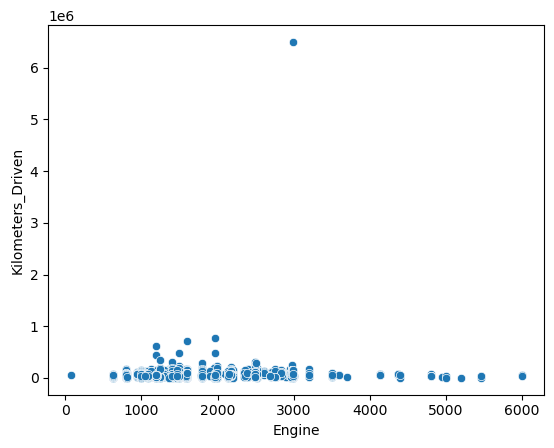

In [210]:
# Kilometers_Driven Vs Engine
sns.scatterplot(data = df, x = 'Engine', y = 'Kilometers_Driven');

- The lesser the kilometers covered, the higher the engine value.

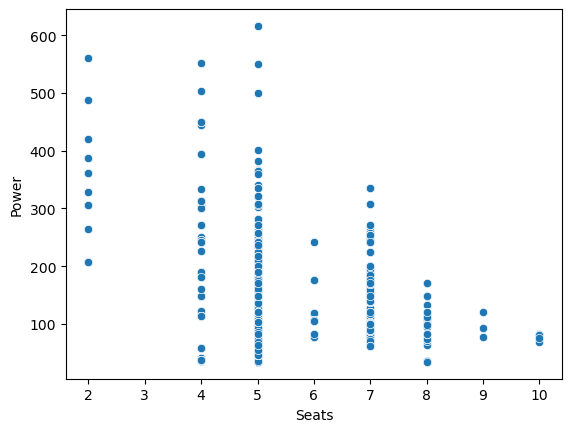

In [213]:
# Power Vs Seats
sns.scatterplot(data = df, x = 'Seats', y = 'Power');

- The cars with 5 seats have the highest power values.

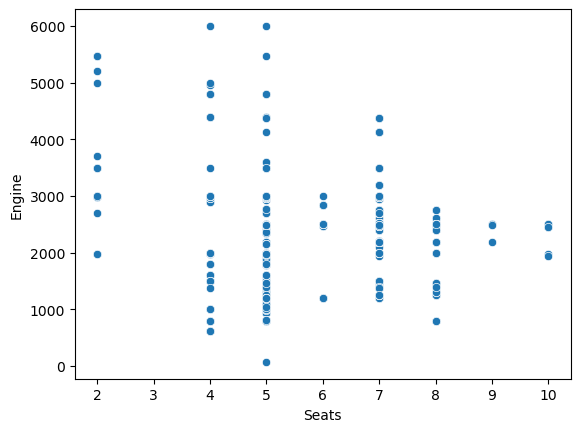

In [212]:
# Power Vs Seats
sns.scatterplot(data = df, x = 'Seats', y = 'Engine');

- The cars with 5 seats have the highest engine values.

### Model Building

In [237]:
# select the features and the target

X = df.drop(["Year", "S.No.", "Location", "Name", "Price", "New_Price", "Mileage_Units", "Engine_Units", "Power_Units"], axis = 1)
y = df["New_Price"]

In [238]:
X.head()

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,72000,CNG,Manual,First,26.60,998,58.16,5.0
1,41000,Diesel,Manual,First,19.67,1582,126.20,5.0
2,46000,Petrol,Manual,First,18.20,1199,88.70,5.0
3,87000,Diesel,Manual,First,20.77,1248,88.76,7.0
4,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0


### **One-Hot Encoding for the categorical variables**

In [239]:
x = pd.get_dummies(X, drop_first=True)

x.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,72000,26.60,998,58.16,5.0,0,0,0,0,1,0,0,0
1,41000,19.67,1582,126.20,5.0,1,0,0,0,1,0,0,0
2,46000,18.20,1199,88.70,5.0,0,0,0,1,1,0,0,0
3,87000,20.77,1248,88.76,7.0,1,0,0,0,1,0,0,0
4,40670,15.20,1968,140.80,5.0,1,0,0,0,0,0,1,0


In [240]:
# split the dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [223]:
x_train.shape

(5662, 24)

### **Normalization**

In [242]:
features_to_normalize = ["Kilometers_Driven", "Mileage", "Engine", "Power", "Seats"]

#creating a deep copy
train_data = x_train.copy()
test_data = x_test.copy()

scaler = MinMaxScaler()
train_data[features_to_normalize] = scaler.fit_transform(x_train[features_to_normalize])
test_data[features_to_normalize] = scaler.transform(x_test[features_to_normalize])

In [243]:
train_data

,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
4857,0.008648,0.551282,0.263685,0.125143,0.625,1,0,0,0,1,0,0,0
4034,0.003051,0.629100,0.137688,0.039939,0.375,0,0,0,1,1,0,0,0
5834,0.010093,0.515802,0.183522,0.056676,0.375,0,0,0,1,1,0,1,0
2369,0.010989,0.607036,0.208759,0.085013,0.375,0,0,0,1,1,0,1,0
2938,0.012282,0.415325,0.390982,0.197471,0.625,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0.004614,0.629100,0.137688,0.039939,0.375,0,0,0,1,1,0,0,0
3264,0.020116,0.423673,0.384301,0.321035,0.375,1,0,0,0,0,0,0,0
1653,0.008974,0.554562,0.208759,0.090586,0.375,0,0,0,1,1,0,0,0
2607,0.008282,0.000000,0.654110,0.434386,0.375,0,0,0,1,0,0,0,0


### **Model Performance**

In [244]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

### **Build the Regression Model**

In [251]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(train_data, y_train)